<a href="https://colab.research.google.com/github/NisalDaksith/AND-OR-NOT/blob/main/Humidity_Predictor_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import pickle
from numpy import log 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_predict   
import itertools

In [59]:
df = pd.read_csv('/content/colombo_rh_2012-2018.csv')
df

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0
...,...,...,...,...,...,...,...
4398,43466,COLOMBO,RHMAX,2018,12,27,90.0
4399,43466,COLOMBO,RHMAX,2018,12,28,88.0
4400,43466,COLOMBO,RHMAX,2018,12,29,76.0
4401,43466,COLOMBO,RHMAX,2018,12,30,81.0


In [60]:
df = df.drop(df[df['element_name'] == 'RHMIN'].index)
df

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0
...,...,...,...,...,...,...,...
4398,43466,COLOMBO,RHMAX,2018,12,27,90.0
4399,43466,COLOMBO,RHMAX,2018,12,28,88.0
4400,43466,COLOMBO,RHMAX,2018,12,29,76.0
4401,43466,COLOMBO,RHMAX,2018,12,30,81.0


In [61]:
df = df[['year','month','day','obs_val']]
df

,year,month,day,obs_val
0,2012,1,1,91.0
1,2012,1,2,90.0
2,2012,1,3,89.0
3,2012,1,4,89.0
4,2012,1,5,95.0
...,...,...,...,...
4398,2018,12,27,90.0
4399,2018,12,28,88.0
4400,2018,12,29,76.0
4401,2018,12,30,81.0


In [62]:
df.isna().sum()

year        0
month       0
day         0
obs_val    20
dtype: int64

In [63]:
mean = df['obs_val'].mean()
df['obs_val'].fillna(mean,inplace = True)

<ipython-input-63-9dd391c0ad5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obs_val'].fillna(mean,inplace = True)


In [64]:
df.isna().sum()

year       0
month      0
day        0
obs_val    0
dtype: int64

In [65]:
df.duplicated().sum()

365

In [66]:
df = df.drop_duplicates()
df.shape

(2577, 4)

In [67]:
df.head(65)

,year,month,day,obs_val
0,2012,1,1,91.000000
1,2012,1,2,90.000000
2,2012,1,3,89.000000
3,2012,1,4,89.000000
4,2012,1,5,95.000000
...,...,...,...,...
60,2012,2,30,86.832991
61,2012,2,31,86.832991
62,2012,3,1,90.000000
63,2012,3,2,84.000000


In [68]:
cols = ['year','month','day']

for col in cols:
    unique_vals = df[col].unique()
    print(col, unique_vals)

year [2012 2013 2014 2015 2016 2017 2018]
month [ 1  2  3  4  5  6  7  8  9 10 11 12]
day [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [69]:
df = df.drop(df[((df['year'] == 2012) | (df['year'] == 2016)) & (df['month'] == 2) & ((df['day'] == 30) | (df['day'] == 31))].index)
df

,year,month,day,obs_val
0,2012,1,1,91.0
1,2012,1,2,90.0
2,2012,1,3,89.0
3,2012,1,4,89.0
4,2012,1,5,95.0
...,...,...,...,...
2937,2018,12,27,90.0
2938,2018,12,28,88.0
2939,2018,12,29,76.0
2940,2018,12,30,81.0


In [70]:
df = df.drop(df[(df['month'] == 2) & ((df['day'] == 29) | (df['day'] == 30) | (df['day'] == 31))].index)
df

,year,month,day,obs_val
0,2012,1,1,91.0
1,2012,1,2,90.0
2,2012,1,3,89.0
3,2012,1,4,89.0
4,2012,1,5,95.0
...,...,...,...,...
2937,2018,12,27,90.0
2938,2018,12,28,88.0
2939,2018,12,29,76.0
2940,2018,12,30,81.0


In [71]:
cols=["year","month","day"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [72]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df

,year,month,day,obs_val,date
0,2012,1,1,91.0,2012-01-01
1,2012,1,2,90.0,2012-01-02
2,2012,1,3,89.0,2012-01-03
3,2012,1,4,89.0,2012-01-04
4,2012,1,5,95.0,2012-01-05
...,...,...,...,...,...
2937,2018,12,27,90.0,2018-12-27
2938,2018,12,28,88.0,2018-12-28
2939,2018,12,29,76.0,2018-12-29
2940,2018,12,30,81.0,2018-12-30


In [73]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
df.drop(['year', 'month', 'day'], axis=1,inplace=True)
df = df.dropna()
df

,obs_val,date
0,91.0,2012-01-01
1,90.0,2012-01-02
2,89.0,2012-01-03
3,89.0,2012-01-04
4,95.0,2012-01-05
...,...,...
2937,90.0,2018-12-27
2938,88.0,2018-12-28
2939,76.0,2018-12-29
2940,81.0,2018-12-30


In [74]:
df = df.set_index('date')

In [75]:
df

,obs_val
date,
2012-01-01,91.0
2012-01-02,90.0
2012-01-03,89.0
2012-01-04,89.0
2012-01-05,95.0
...,...
2018-12-27,90.0
2018-12-28,88.0
2018-12-29,76.0


In [76]:
df.to_csv("df_processed.csv", index = True)

<Axes: xlabel='date'>

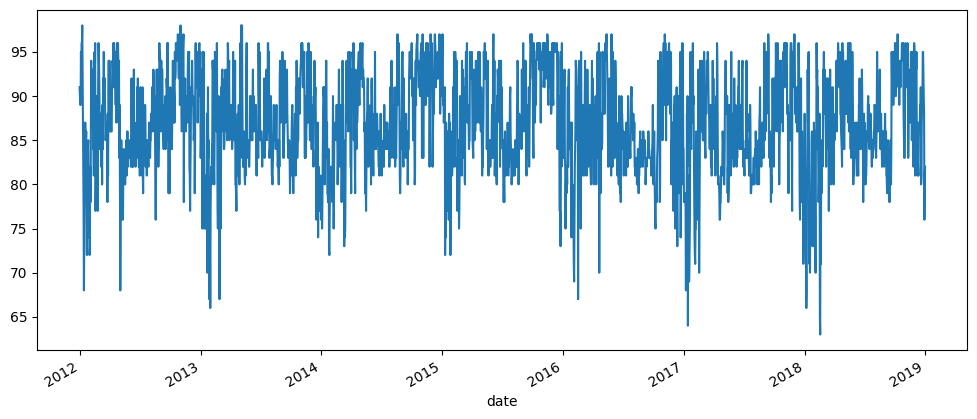

In [77]:
df['obs_val'].plot(figsize=(12,5))

In [78]:
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

adf_test(df['obs_val'])

1. ADF :  -6.160359809013597
2. P-Value :  7.198824831078941e-08
3. Num Of Lags :  27
4. Num Of Observations Used For ADF Regression: 2527
5. Critical Values :
	 1% :  -3.4329404056582598
	 5% :  -2.862684432835292
	 10% :  -2.567379225007826


In [79]:
stepwise_fit = auto_arima(df['obs_val'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14863.215, Time=1.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16152.936, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14917.859, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15366.156, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=30074.723, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=14855.179, Time=2.98 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=15083.609, Time=1.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14860.662, Time=4.52 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=14842.903, Time=9.98 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=14992.316, Time=2.65 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=14847.517, Time=6.77 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=14838.573, Time=8.47 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=14937.384, Time=0.99 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=14836.882, Time=5.34 sec
 ARIMA(3,0,4)(0,0,0

In [80]:
# The auto_arima function is part of the pmdarima package, which provides an implementation of the ARIMA algorithm.
# This function automatically selects the optimal parameters for the ARIMA model using a stepwise approach. 
# It fits multiple ARIMA models with different parameters and selects the best one based on the AIC value.

In [88]:
train=df.iloc[:-100]
test=df.iloc[-100:]
print(train.shape,test.shape)

(2455, 1) (100, 1)


In [89]:
from statsmodels.tsa.arima.model import ARIMA
result=ARIMA(train['obs_val'],order=(1,0,0))
result=result.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                obs_val   No. Observations:                 2455
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7172.534
Date:                Sat, 06 May 2023   AIC                          14351.069
Time:                        05:05:49   BIC                          14368.486
Sample:                             0   HQIC                         14357.398
                               - 2455                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.7005      0.241    359.208      0.000      86.227      87.174
ar.L1          0.6145      0.015     40.856      0.000       0.585       0.644
sigma2        20.1866      0.454     44.492      0.000      19.297      21.076
===================================================================================
Ljung-Box (L1) (Q):                  19.84   Jarque-Bera (JB):               328.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.30
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='date'>

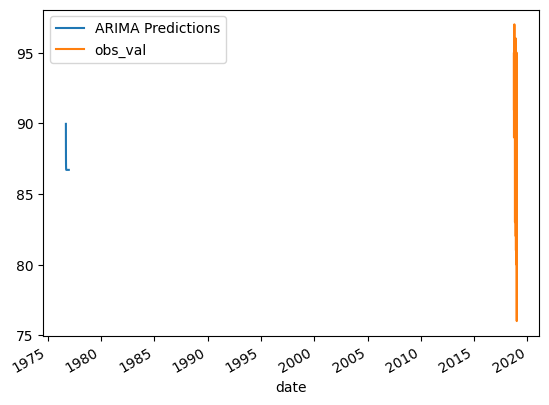

In [90]:
start=len(train)
end=len(train)+len(test)-1
pred=result.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['obs_val'].plot(legend=True)
